# Figure 9 - Denoising blood differentiation data (Paul et al.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import scipy as sp
from dca.api import dca

import matplotlib
matplotlib.rc('pdf', fonttype=42)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

sc.settings.set_figure_params(dpi=120)
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = (7,7)

/Users/gokcen/.miniconda3/lib/python3.8/site-packages/kopt/config.py:60: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


## Load Paul15 dataset

In [2]:
adata = sc.datasets.paul15()

# replace Sfpi1 with Pu.1
genes = adata.var_names.to_native_types()
genes[genes == 'Sfpi1'] = 'Pu.1'
adata.var_names = pd.Index(genes)

adata.raw = adata.copy()

sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X', method='gauss')
sc.tl.dpt(adata, n_branchings=1)

adata

... storing 'paul15_clusters' as categorical
/Users/gokcen/.miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.
<ipython-input-2-990f6460076f>:4: FutureWarning: The 'to_native_types' method is deprecated and will be removed in a future version. Use 'astype(str)' instead.
  genes = adata.var_names.to_native_types()


AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    uns: 'iroot', 'log1p', 'pca', 'neighbors', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Calculate diffusion pseudotime and groups

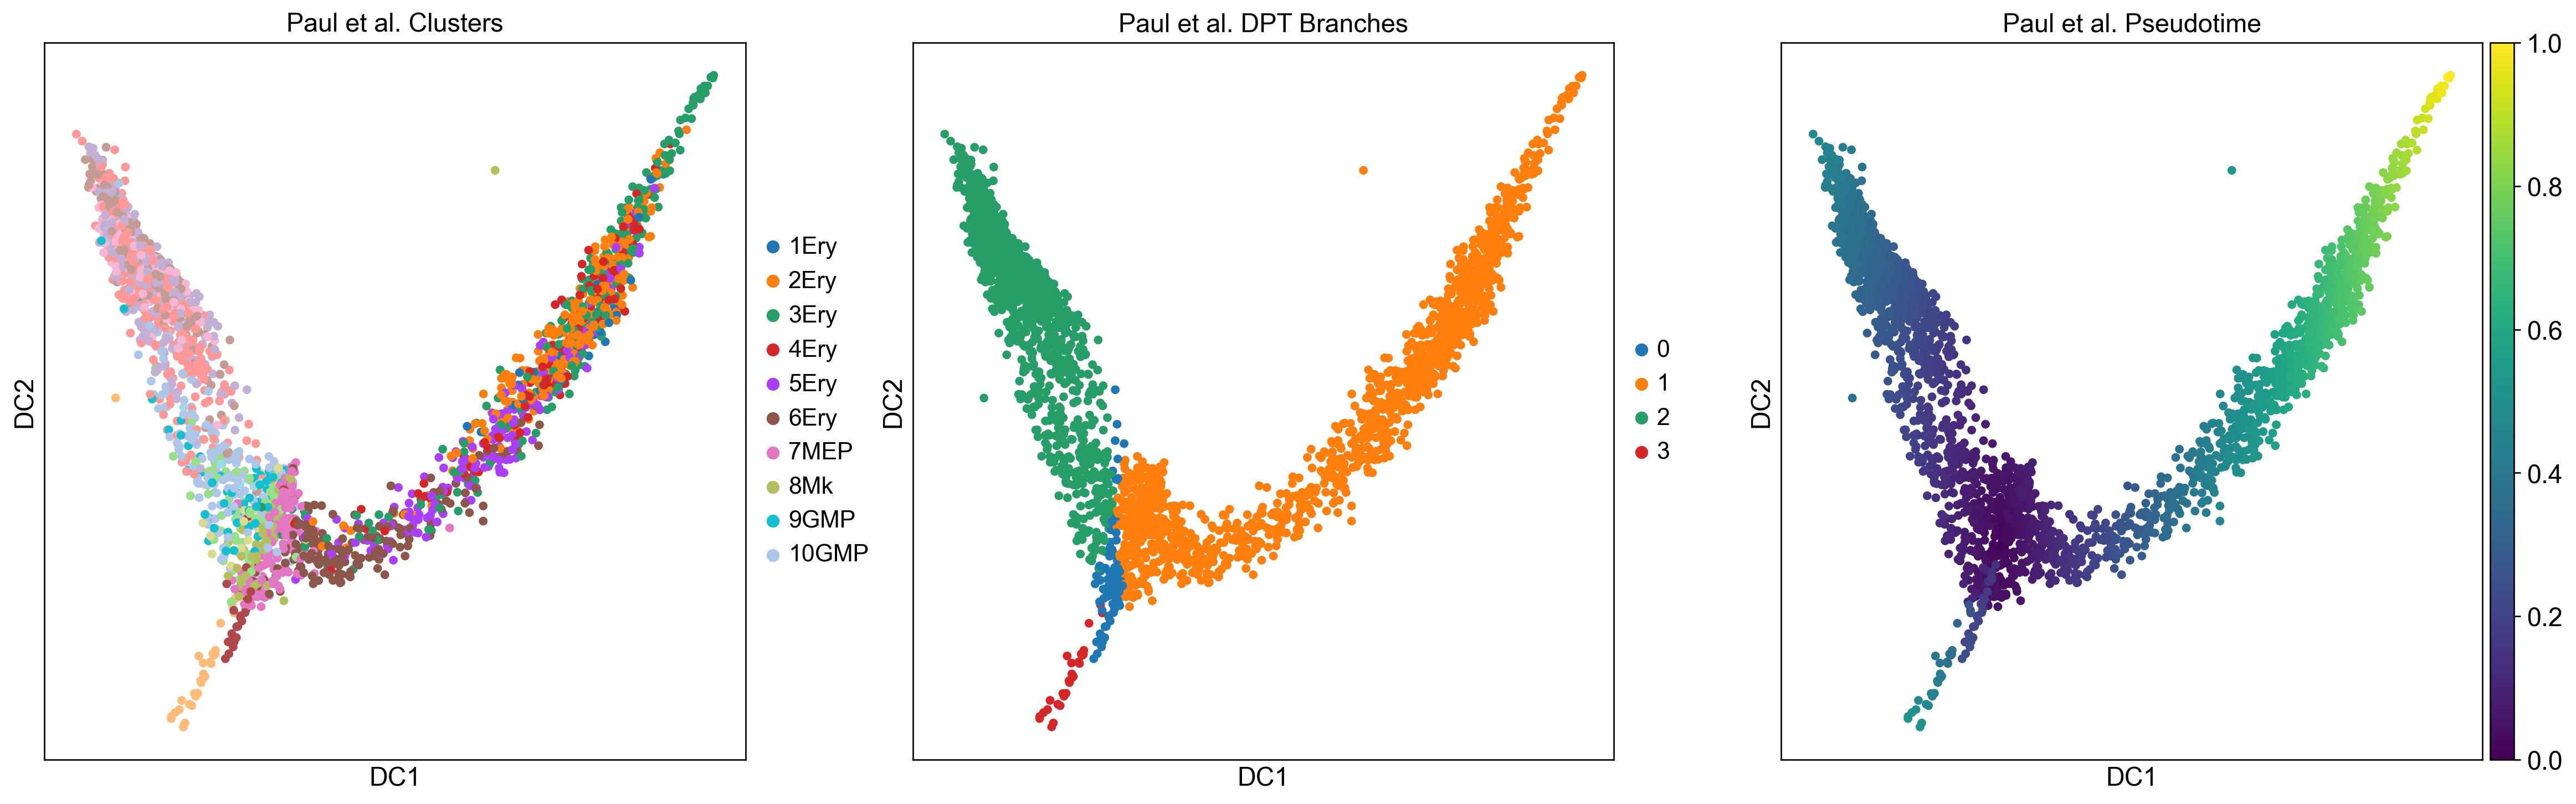

In [3]:
sc.pl.diffmap(adata, color=['paul15_clusters', 'dpt_groups', 'dpt_pseudotime'], size=90, title=['Paul et al. Clusters', 'Paul et al. DPT Branches', 'Paul et al. Pseudotime'])

## Visualize Pu.1 and Gata expression in MEP and GMP branches

/Users/gokcen/.miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


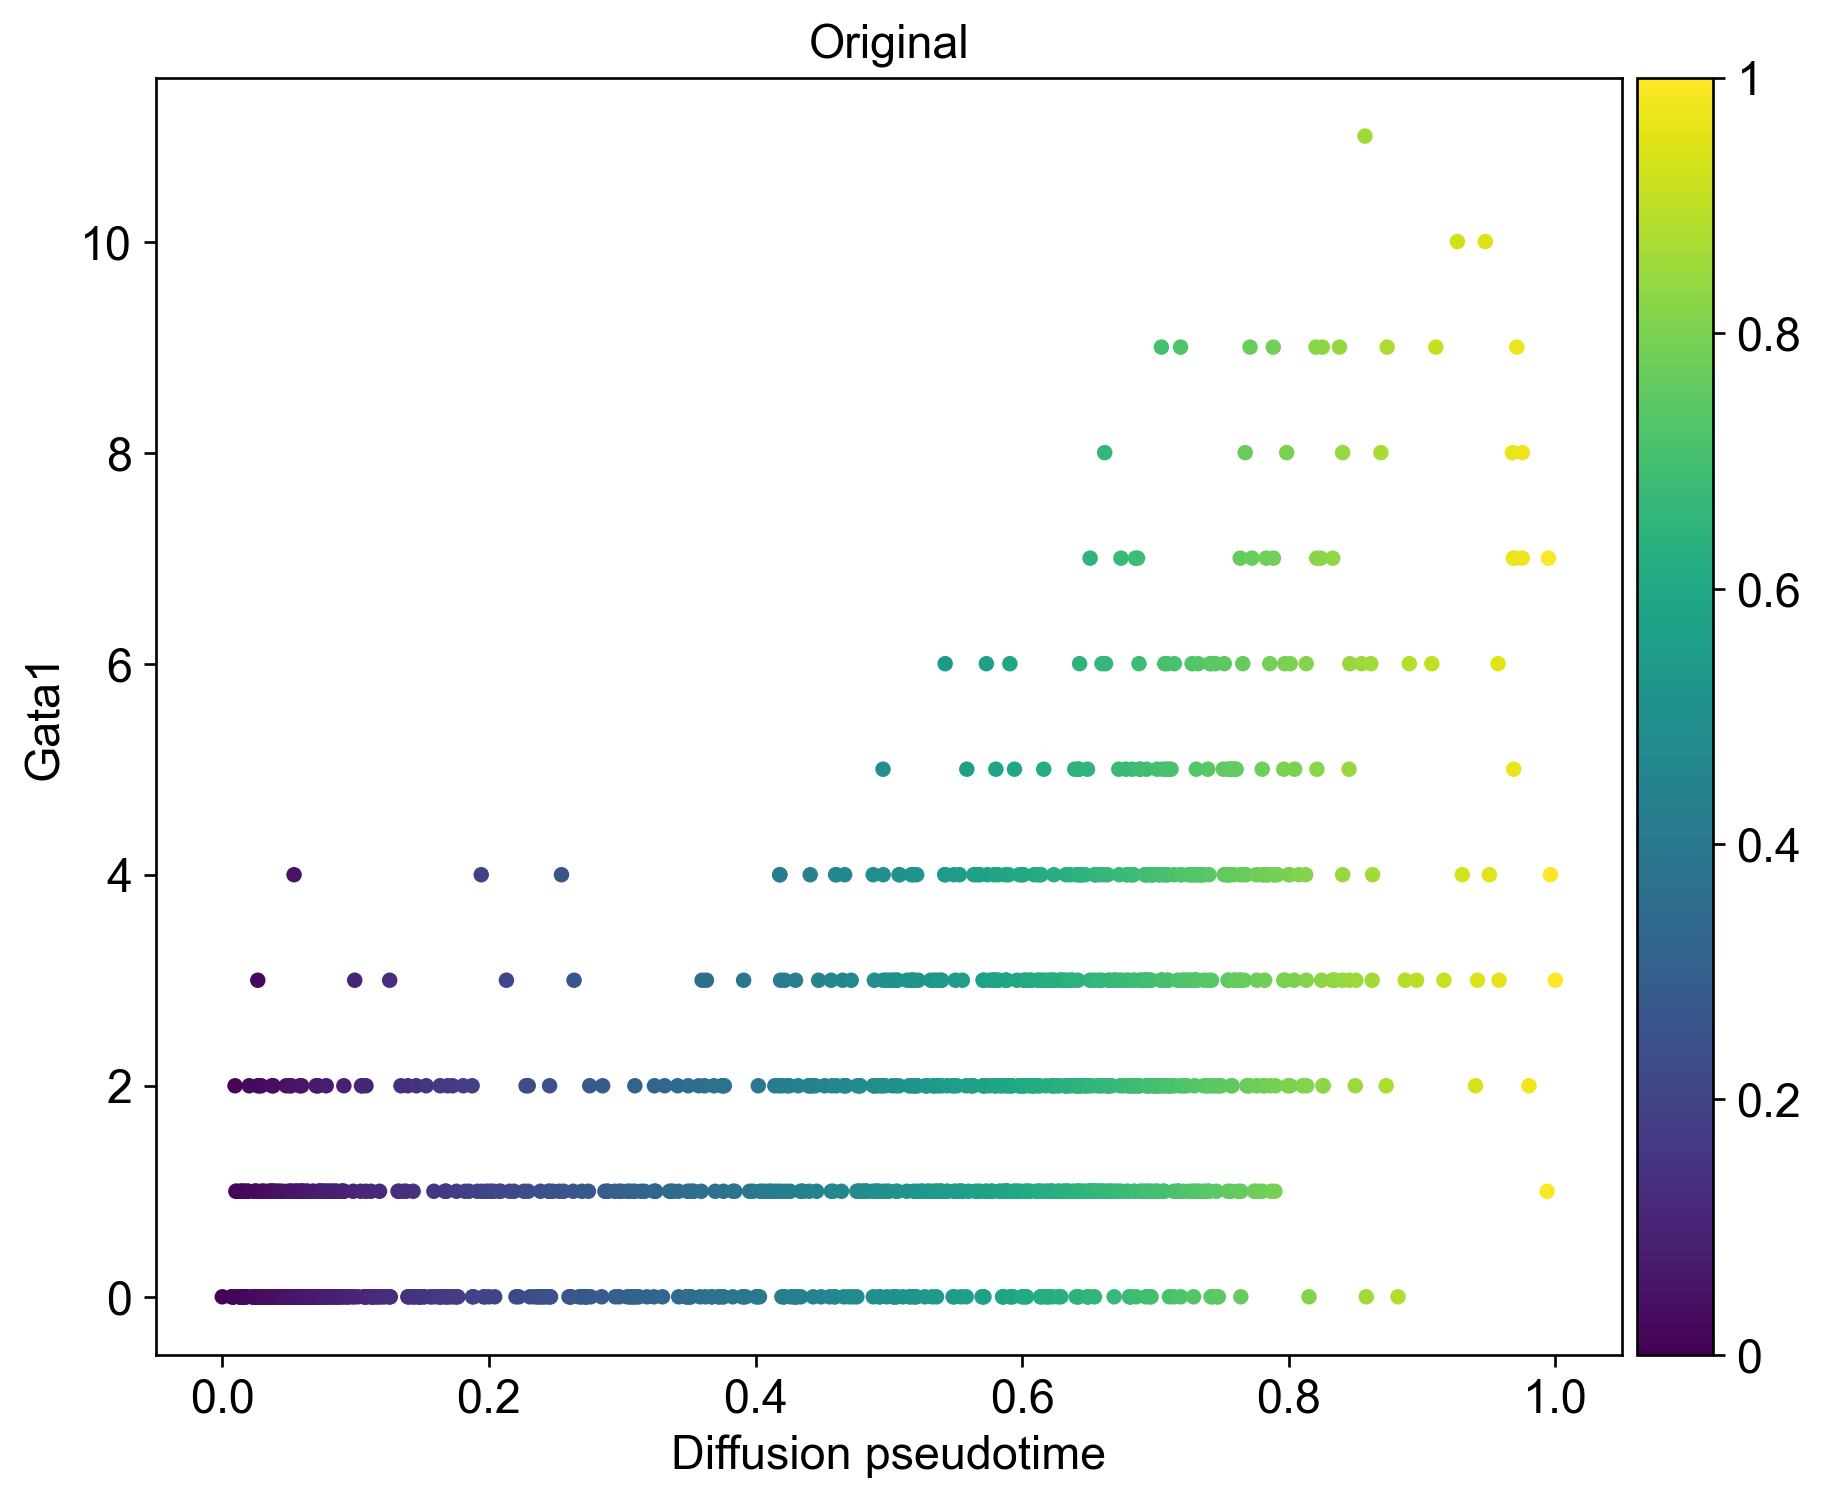

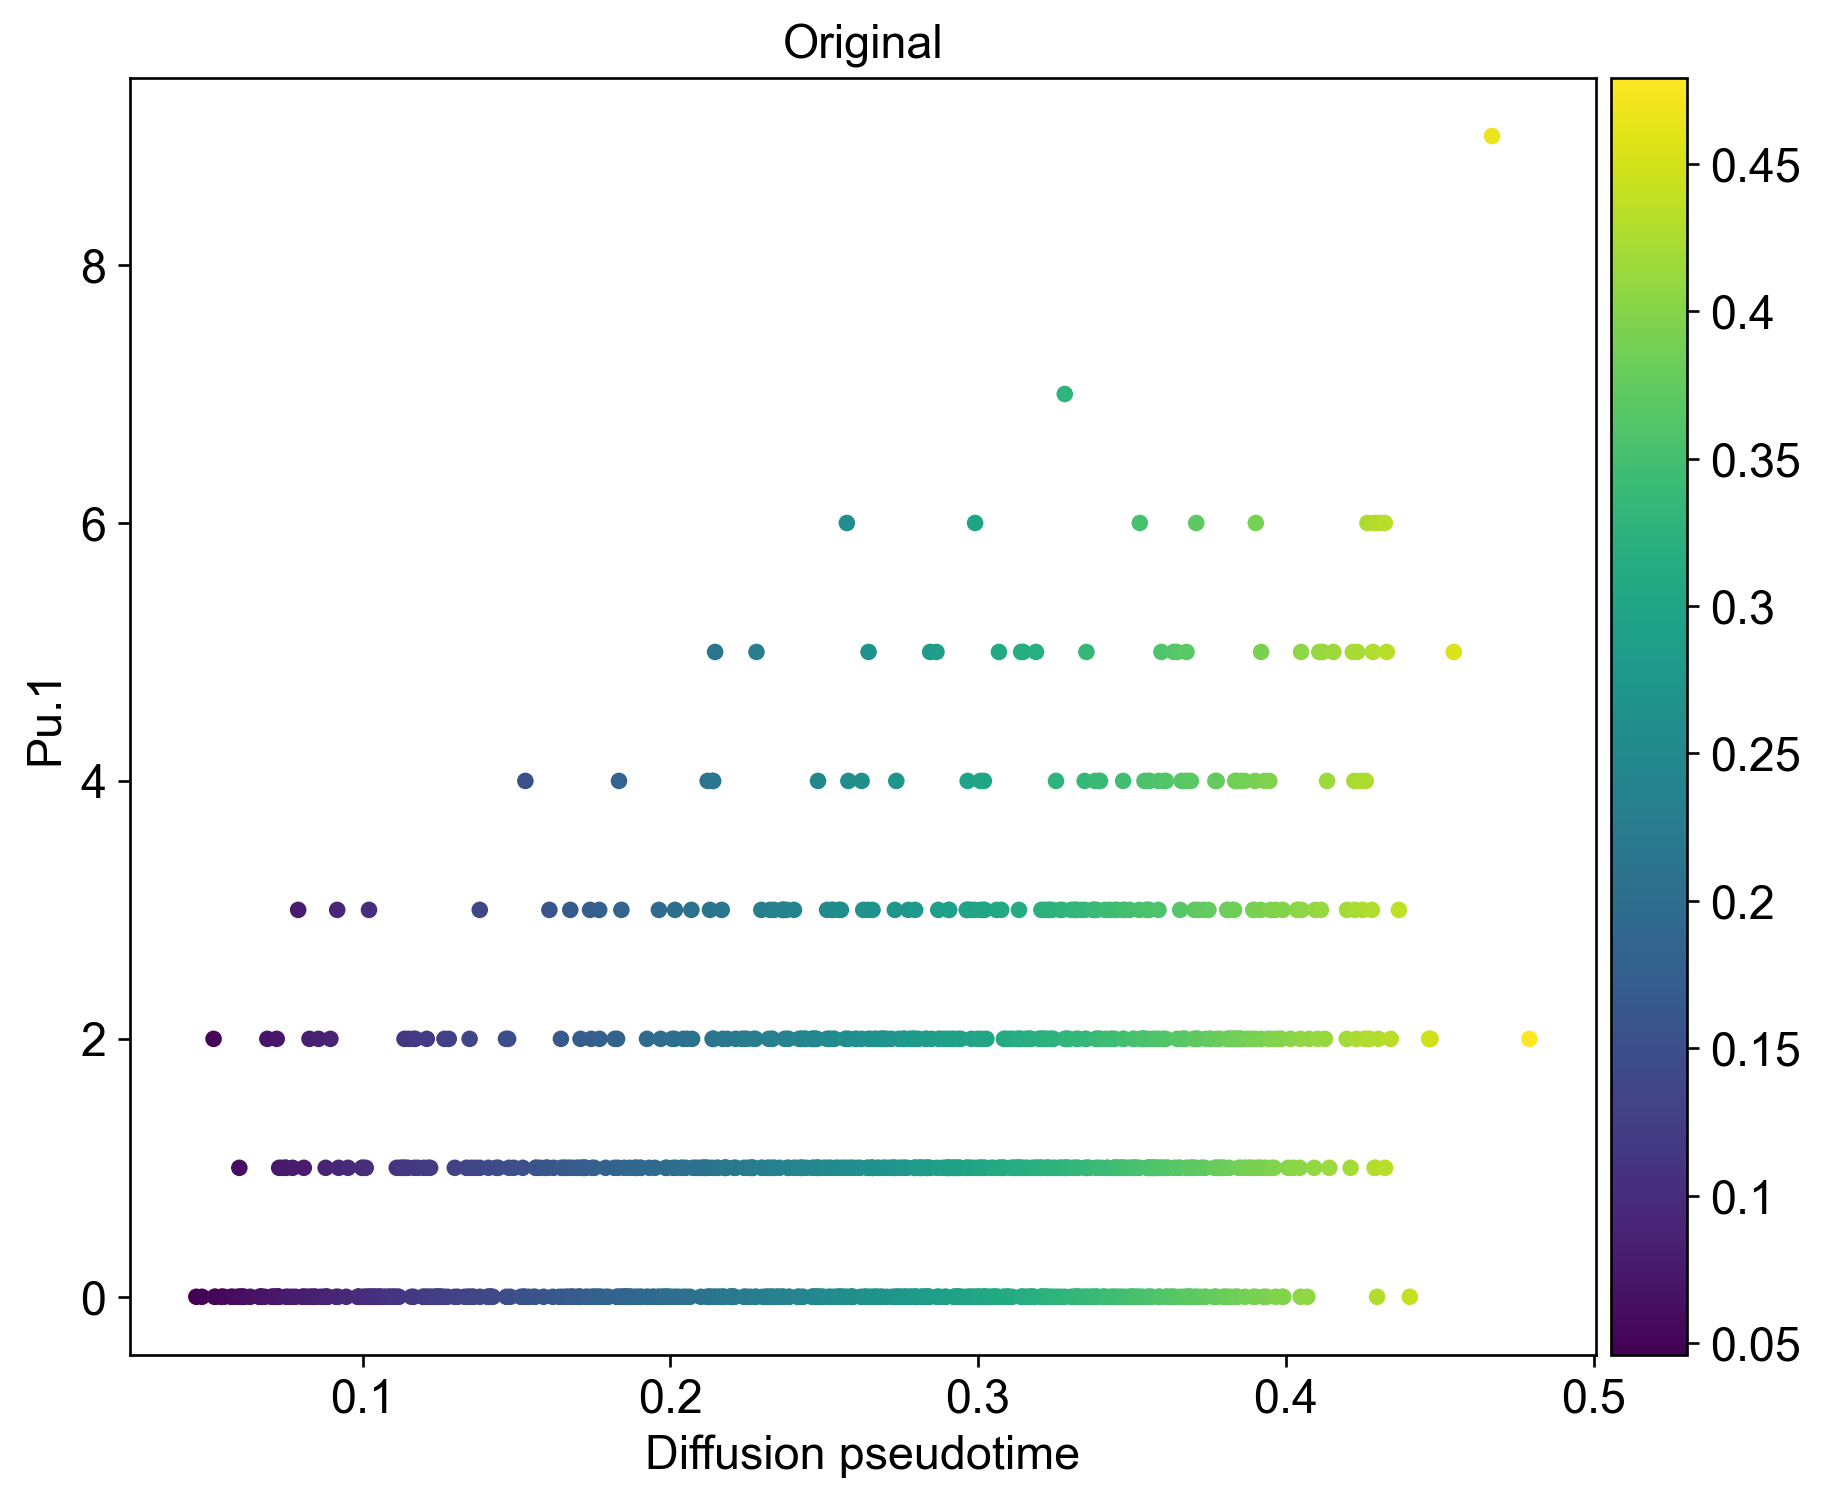

In [4]:
gene1 = 'Gata1'
gene2 = 'Pu.1'

ax = sc.pl.scatter(adata[adata.obs.dpt_groups == '1'], 'dpt_pseudotime', gene1, 
                   color='dpt_pseudotime', color_map='viridis', title='Original', show=False)
ax.set_xlabel('Diffusion pseudotime')

ax = sc.pl.scatter(adata[adata.obs.dpt_groups == '2'], 'dpt_pseudotime', gene2, 
                   color='dpt_pseudotime', color_map='viridis', title='Original', show=False)
ax.set_xlabel('Diffusion pseudotime');

## Denoise data using DCA

In [5]:
%%time

adata_ae = sc.datasets.paul15()

# replace Sfpi1 with Pu.1
genes = adata_ae.var_names.to_native_types()
genes[genes == 'Sfpi1'] = 'Pu.1'
adata_ae.var_names = pd.Index(genes)

dca(adata_ae, ae_type='nb-conddisp')

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.
<timed exec>:4: FutureWarning: The 'to_native_types' method is deprecated and will be removed in a future version. Use 'astype(str)' instead.


dca: Successfully preprocessed 3451 genes and 2730 cells.



/Users/gokcen/.miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
2021-03-20 18:47:43,890 [WARNING] From /Users/gokcen/Code/dca/dca/train.py:41: The name tf.keras.backend.set_session is deprecated. Please use tf.compat.v1.keras.backend.set_session instead.

/Users/gokcen/.miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


dca: Calculating reconstructions...
CPU times: user 7min 7s, sys: 38.5 s, total: 7min 46s
Wall time: 46.2 s


In [6]:
sc.pp.log1p(adata_ae)
sc.pp.pca(adata_ae)
sc.pp.neighbors(adata_ae, n_neighbors=20, use_rep='X')
sc.tl.dpt(adata_ae, n_branchings=1)

adata_ae

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters', 'dca_split', 'n_counts', 'size_factors', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'mean', 'std'
    uns: 'iroot', 'log1p', 'pca', 'neighbors', 'diffmap_evals', 'dpt_changepoints', 'dpt_grouptips'
    obsm: 'X_pca', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Visualize Pu.1-Gata1 anticorrelation on denoised dataset

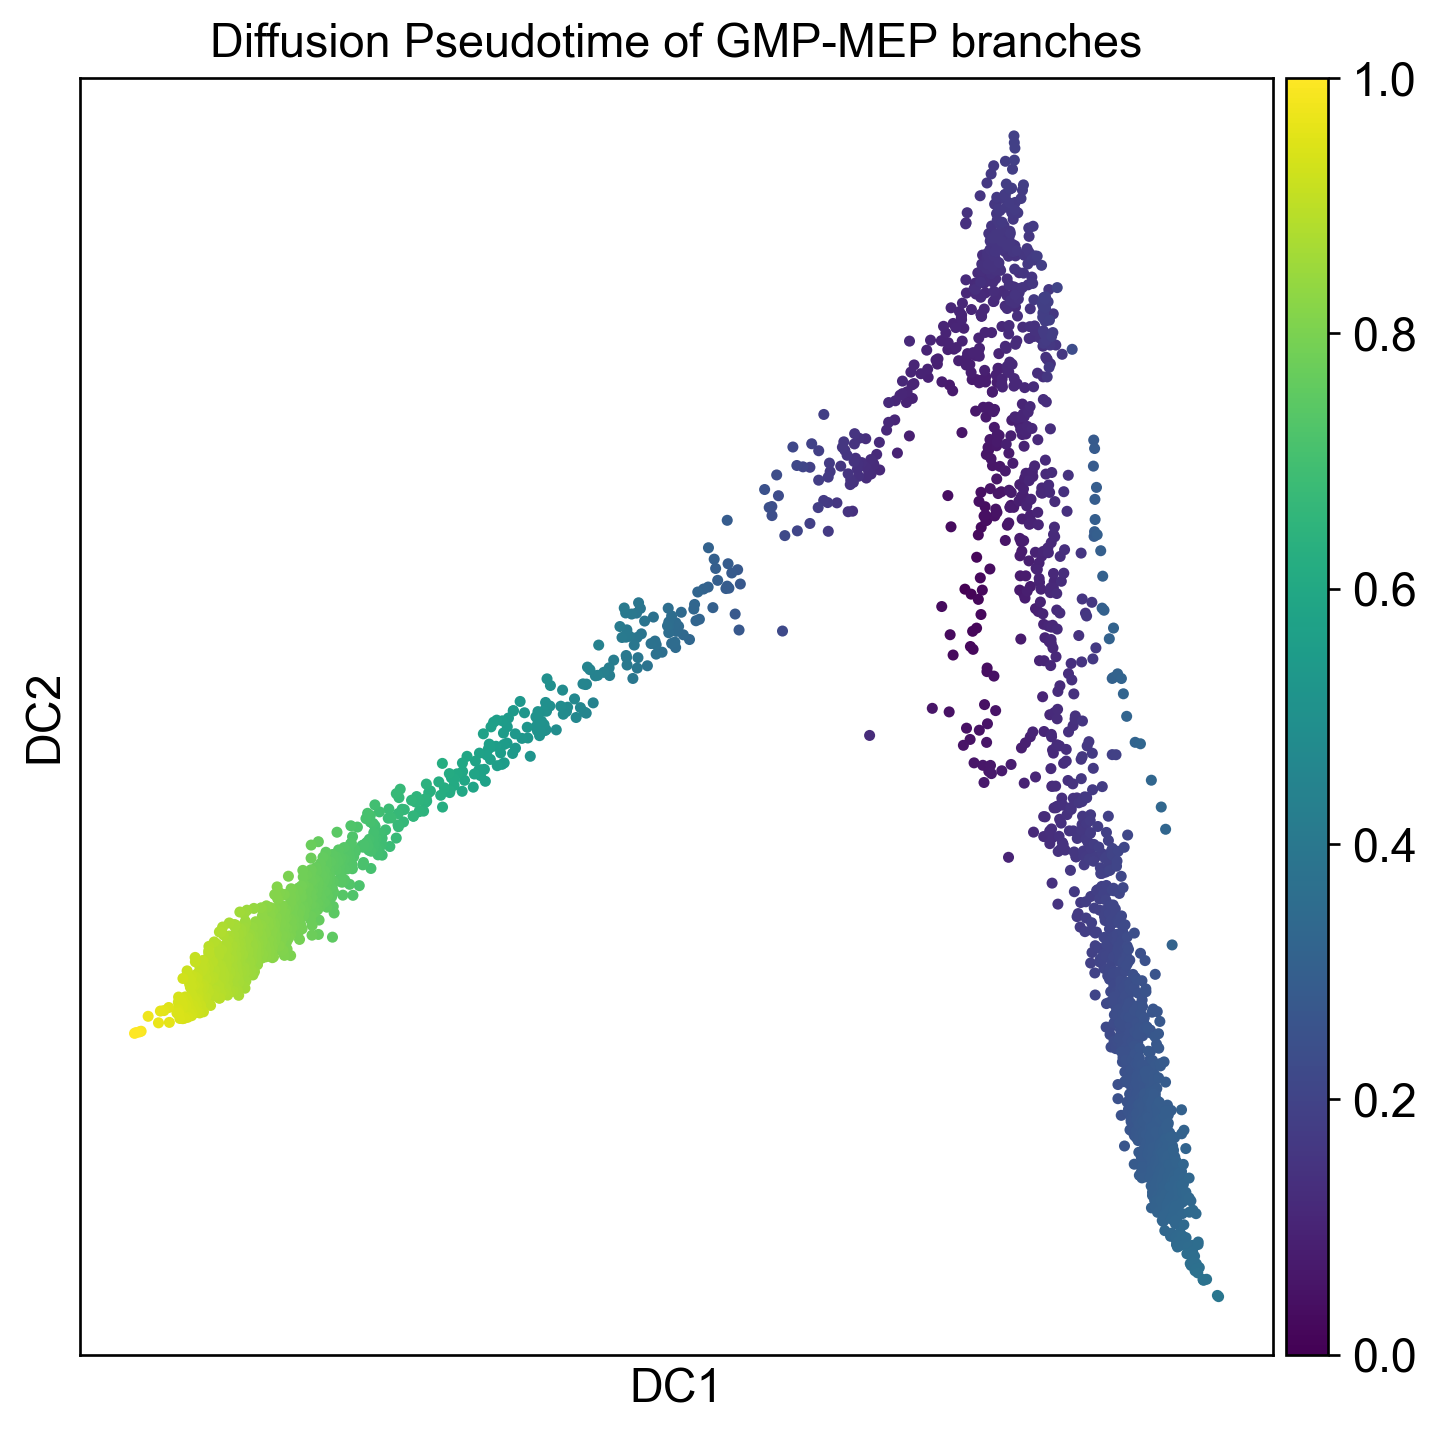

In [7]:
sc.pl.diffmap(adata_ae, color='dpt_pseudotime', title='Diffusion Pseudotime of GMP-MEP branches', color_map='viridis', use_raw=False)

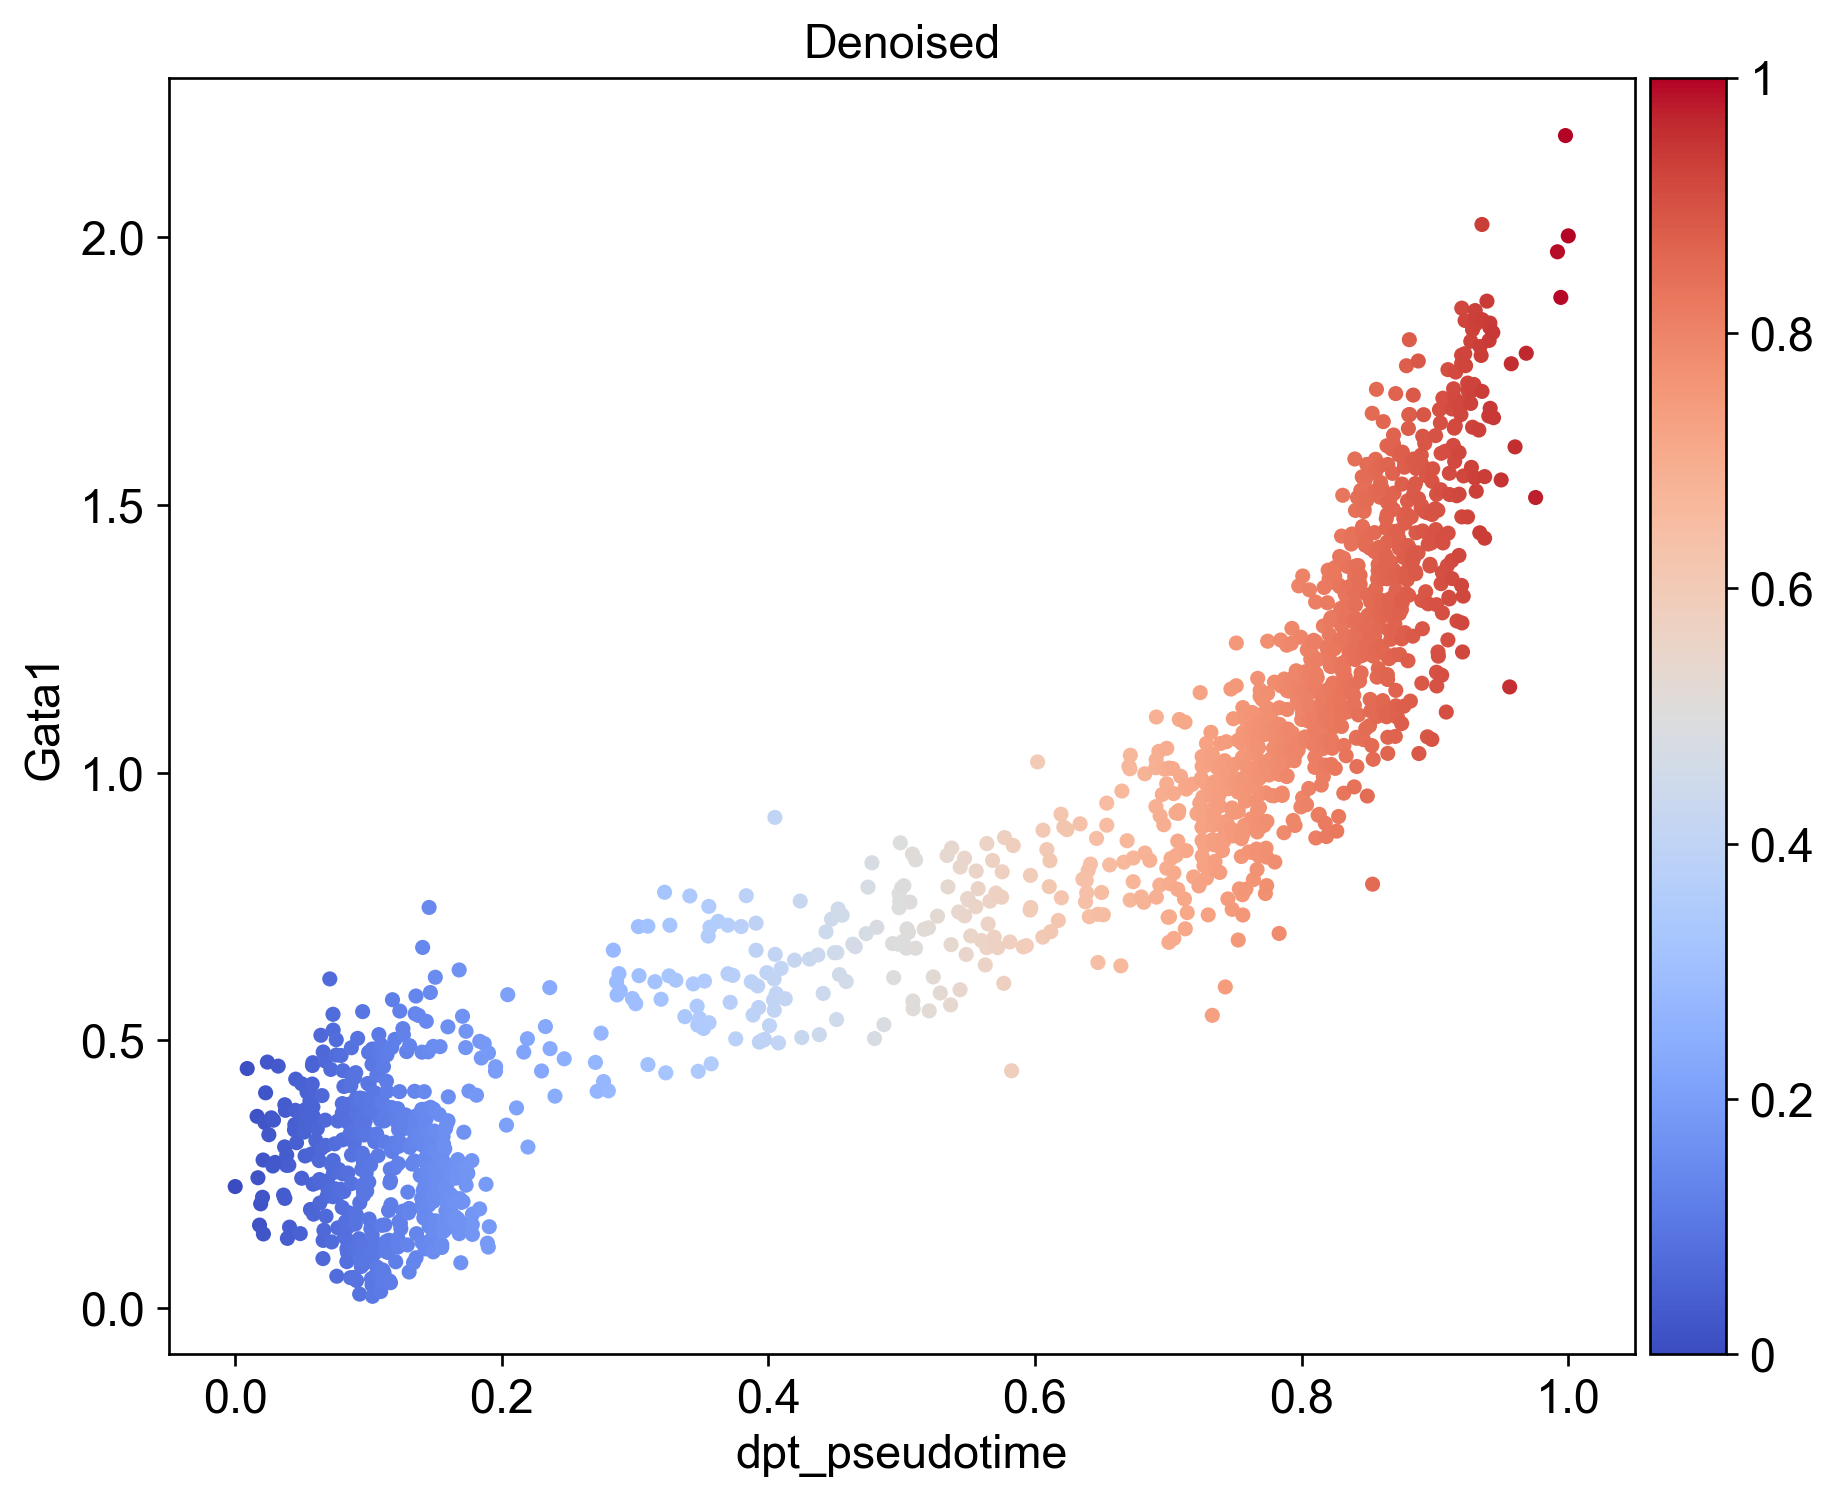

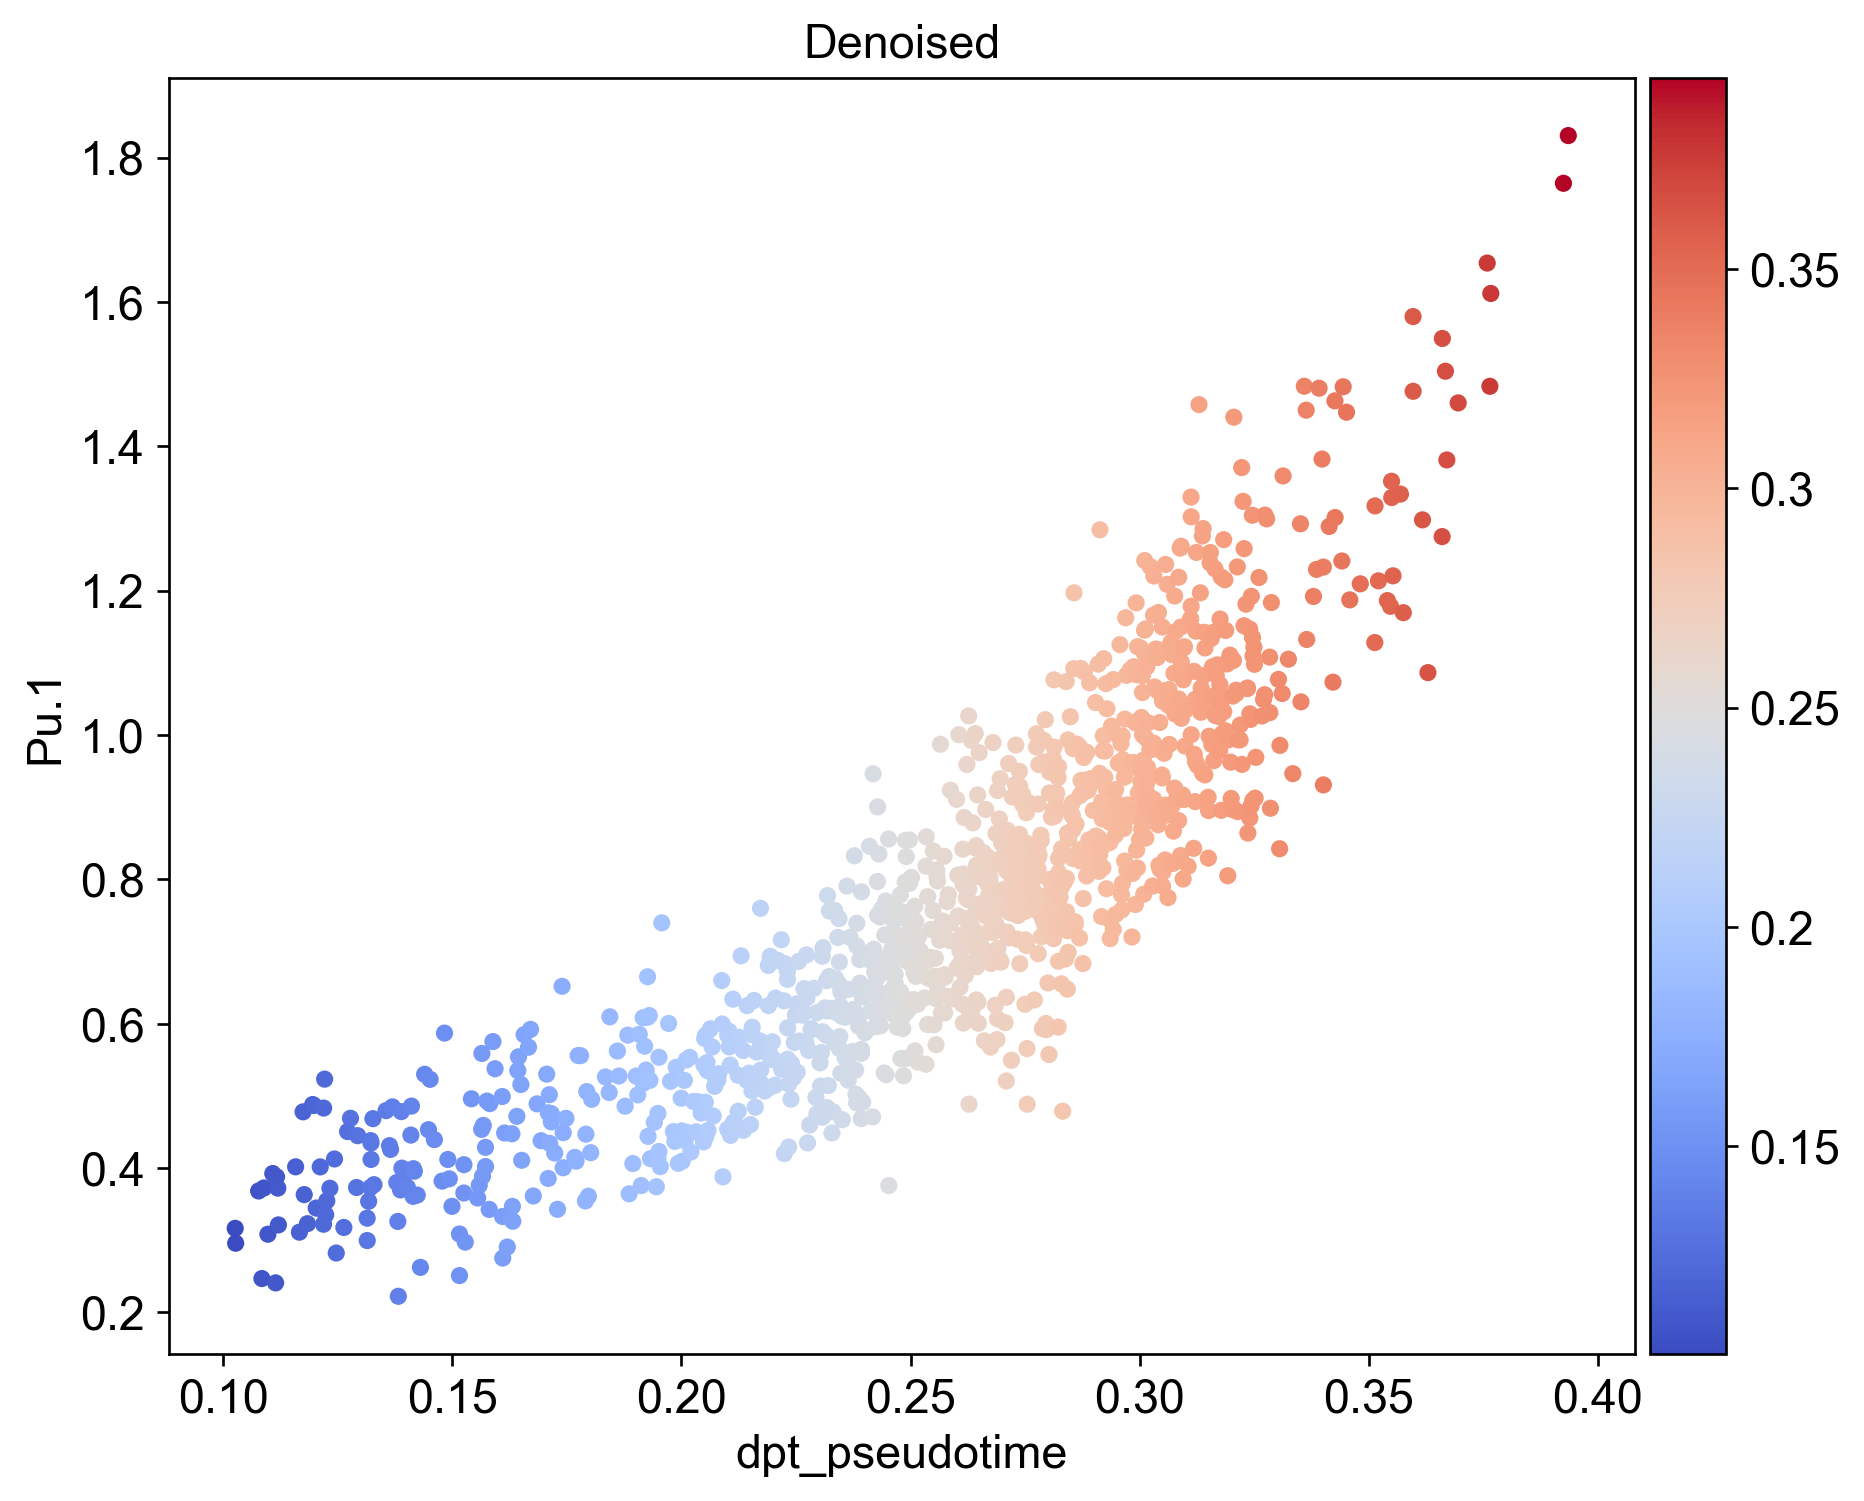

In [20]:
gene1 = 'Gata1'
gene2 = 'Pu.1'

sc.pl.scatter(adata_ae[adata_ae.obs.dpt_groups == '1'], 'dpt_pseudotime', gene1, 
              color='dpt_pseudotime', color_map='coolwarm', title='Denoised', use_raw=False)

sc.pl.scatter(adata_ae[adata_ae.obs.dpt_groups == '2'], 'dpt_pseudotime', gene2, 
              color='dpt_pseudotime', color_map='coolwarm', title='Denoised', use_raw=False)

## Visualize within and across marker group correlations

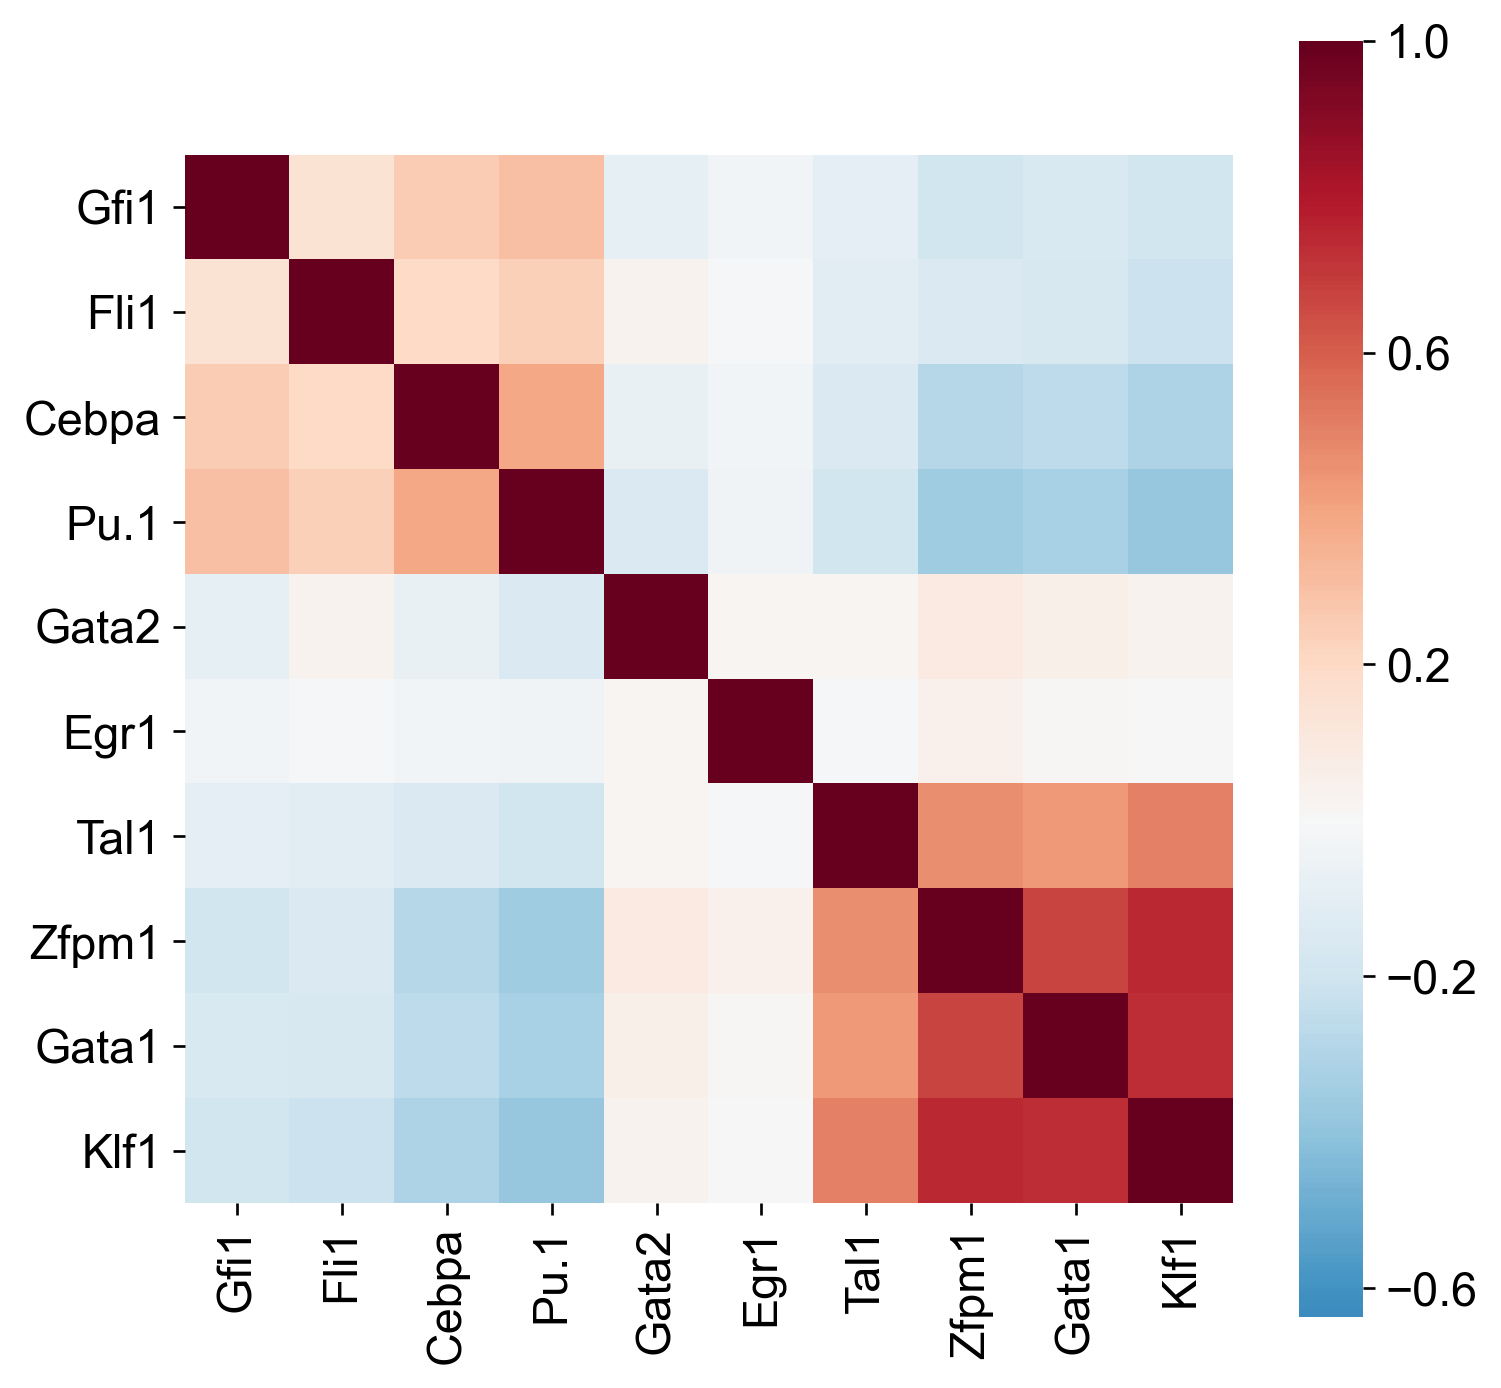

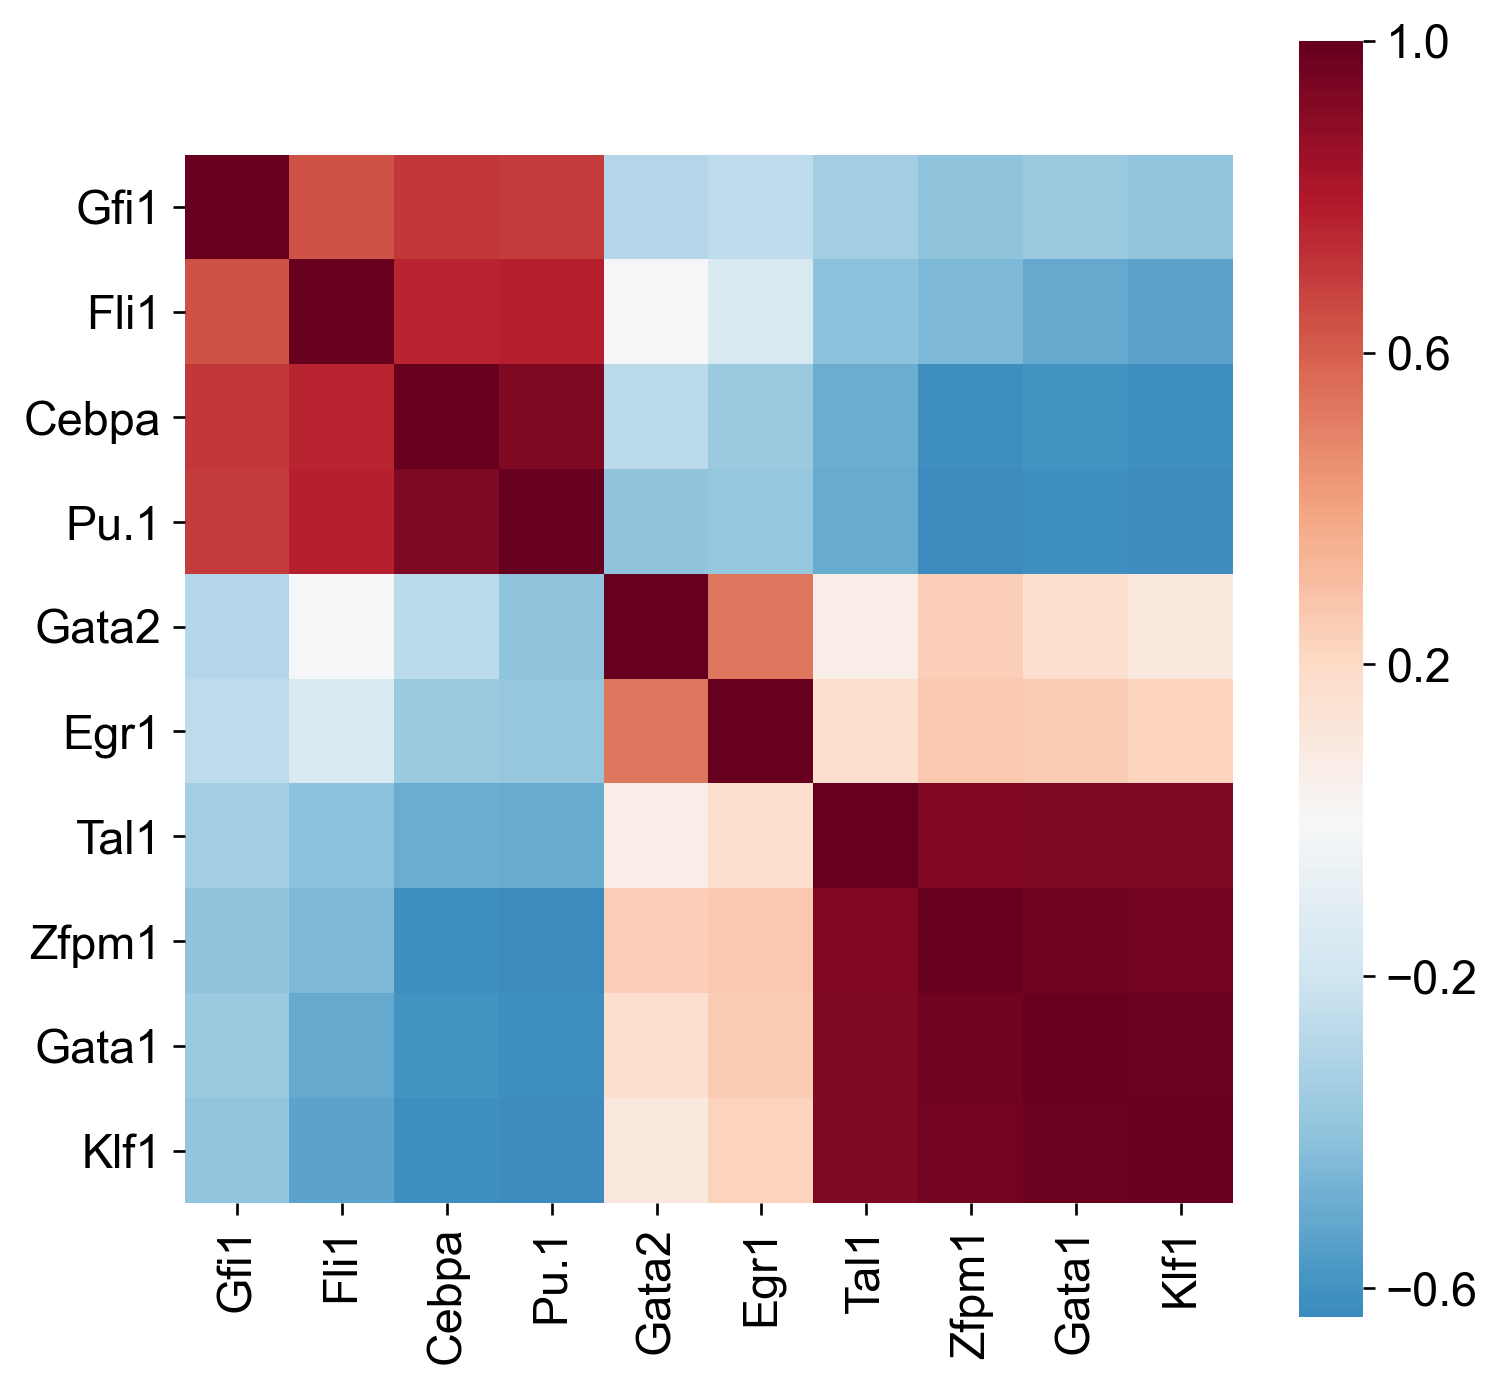

In [17]:
krumsiek_genes = 'Gfi1 Fli1 Cebpa Pu.1 Gata2 Egr1 Tal1 Zfpm1 Gata1 Klf1'.split()

kr_orig_cor_mat = np.corrcoef(adata[:, krumsiek_genes].X, rowvar=False)
kr_ae_cor_mat = np.corrcoef(adata_ae[:, krumsiek_genes].X, rowvar=False)

v1 = min(kr_orig_cor_mat.min(), kr_ae_cor_mat.min())
v2 = max(kr_orig_cor_mat.max(), kr_ae_cor_mat.max())

kr_orig_cor_mat = pd.DataFrame(kr_orig_cor_mat, index=krumsiek_genes, columns=krumsiek_genes)
kr_ae_cor_mat = pd.DataFrame(kr_ae_cor_mat, index=krumsiek_genes, columns=krumsiek_genes)

ax = sns.heatmap(kr_orig_cor_mat, vmin=v1, vmax=v2, center=0, square=True, cmap='RdBu_r', cbar_kws={'ticks': np.linspace(-1, 1.0, 6)})

plt.figure()
sns.heatmap(kr_ae_cor_mat, vmin=v1, vmax=v2, center=0, cmap='RdBu_r', square=True, cbar_kws={'ticks': np.linspace(-1, 1.0, 6)});

## Visualize differentiation using Pu.1 and Gata1

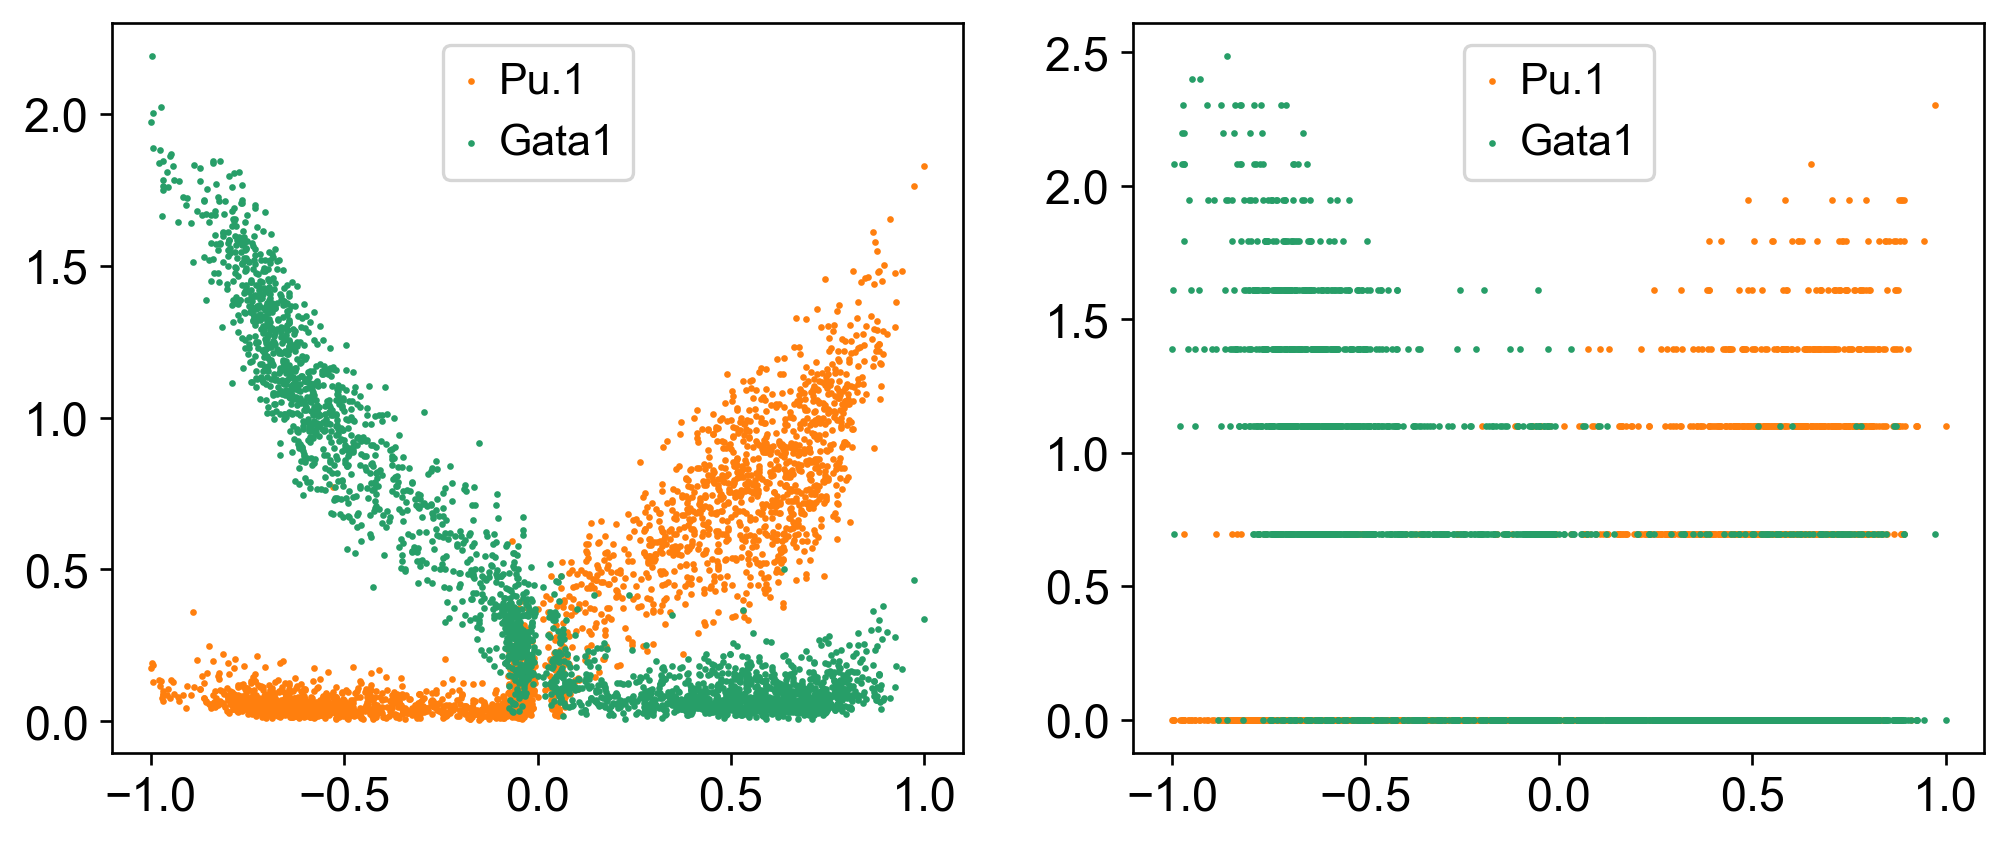

In [10]:
def sqz(x):
    x = x - x.min()
    return x / x.max()

adata_sorted = adata[adata.obs.dpt_order_indices].copy()
adata_sorted_ae = adata_ae[adata.obs.dpt_order_indices].copy()

obs = adata_sorted.obs.copy()
obs.loc[obs.dpt_groups.values == '1', 'dpt_pseudotime'] = -sqz(obs.loc[obs.dpt_groups.values == '1', 'dpt_pseudotime'])
obs.loc[obs.dpt_groups.values == '2', 'dpt_pseudotime'] = sqz(obs.loc[obs.dpt_groups.values == '2', 'dpt_pseudotime'])

adata_sorted.obs = obs
adata_sorted_ae.obs['dpt_pseudotime'] = adata_sorted.obs.dpt_pseudotime

f, axs = plt.subplots(1, 2, figsize=(10, 4))

X = adata_sorted_ae[np.isin(adata_sorted_ae.obs.dpt_groups.values, ('1', '2'))]
axs[0].scatter(X.obs.dpt_pseudotime.values, X[:, 'Pu.1'].X, s=1, c='C1', label='Pu.1')
axs[0].scatter(X.obs.dpt_pseudotime.values, X[:, 'Gata1'].X, s=1, c='C2', label='Gata1')
axs[0].legend();

X = adata_sorted[np.isin(adata_sorted.obs.dpt_groups.values, ('1', '2'))]
axs[1].scatter(X.obs.dpt_pseudotime.values, X[:, 'Pu.1'].X, s=1, c='C1', label='Pu.1')
axs[1].scatter(X.obs.dpt_pseudotime.values, X[:, 'Gata1'].X, s=1, c='C2', label='Gata1')
axs[1].legend();

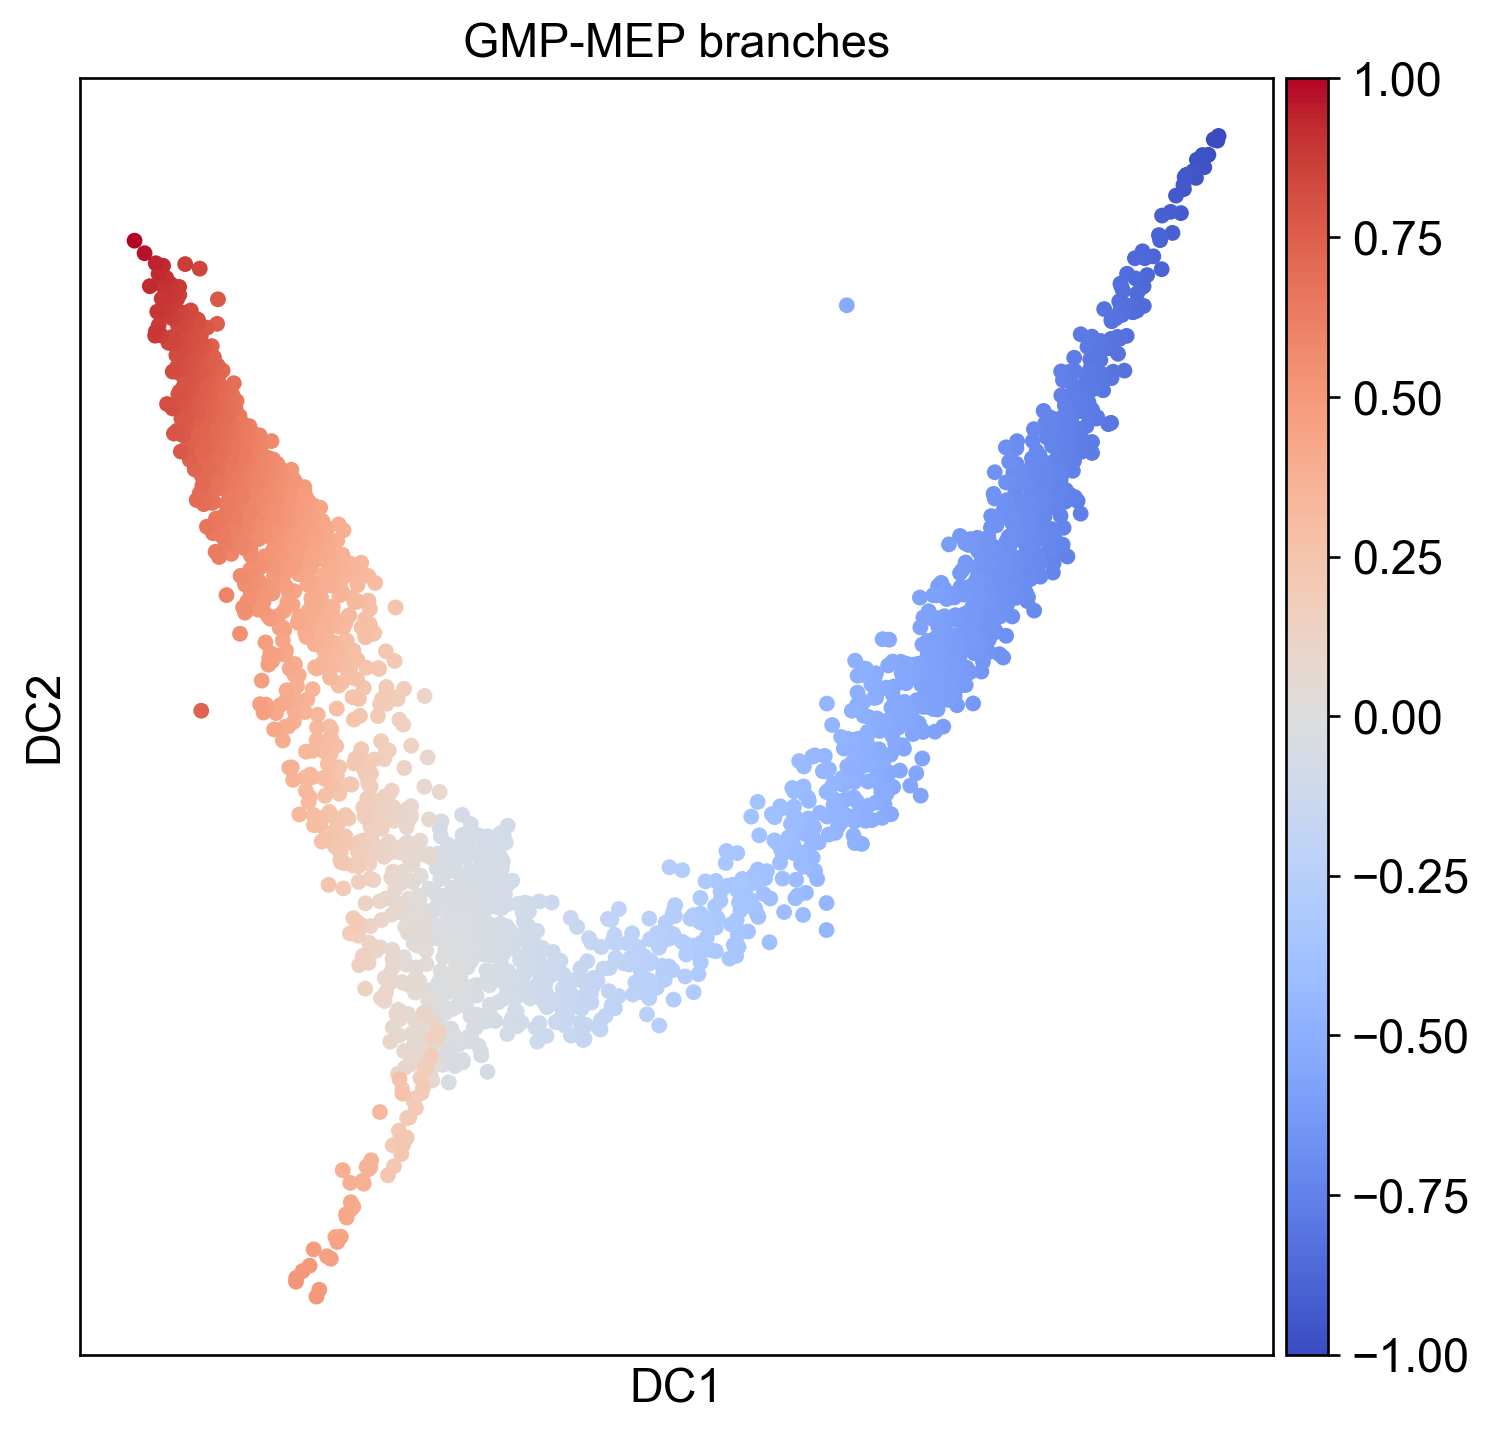

/Users/gokcen/Code/scanpy/scanpy/plotting/_utils.py:745: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_cb = fig.add_axes(rectangle)


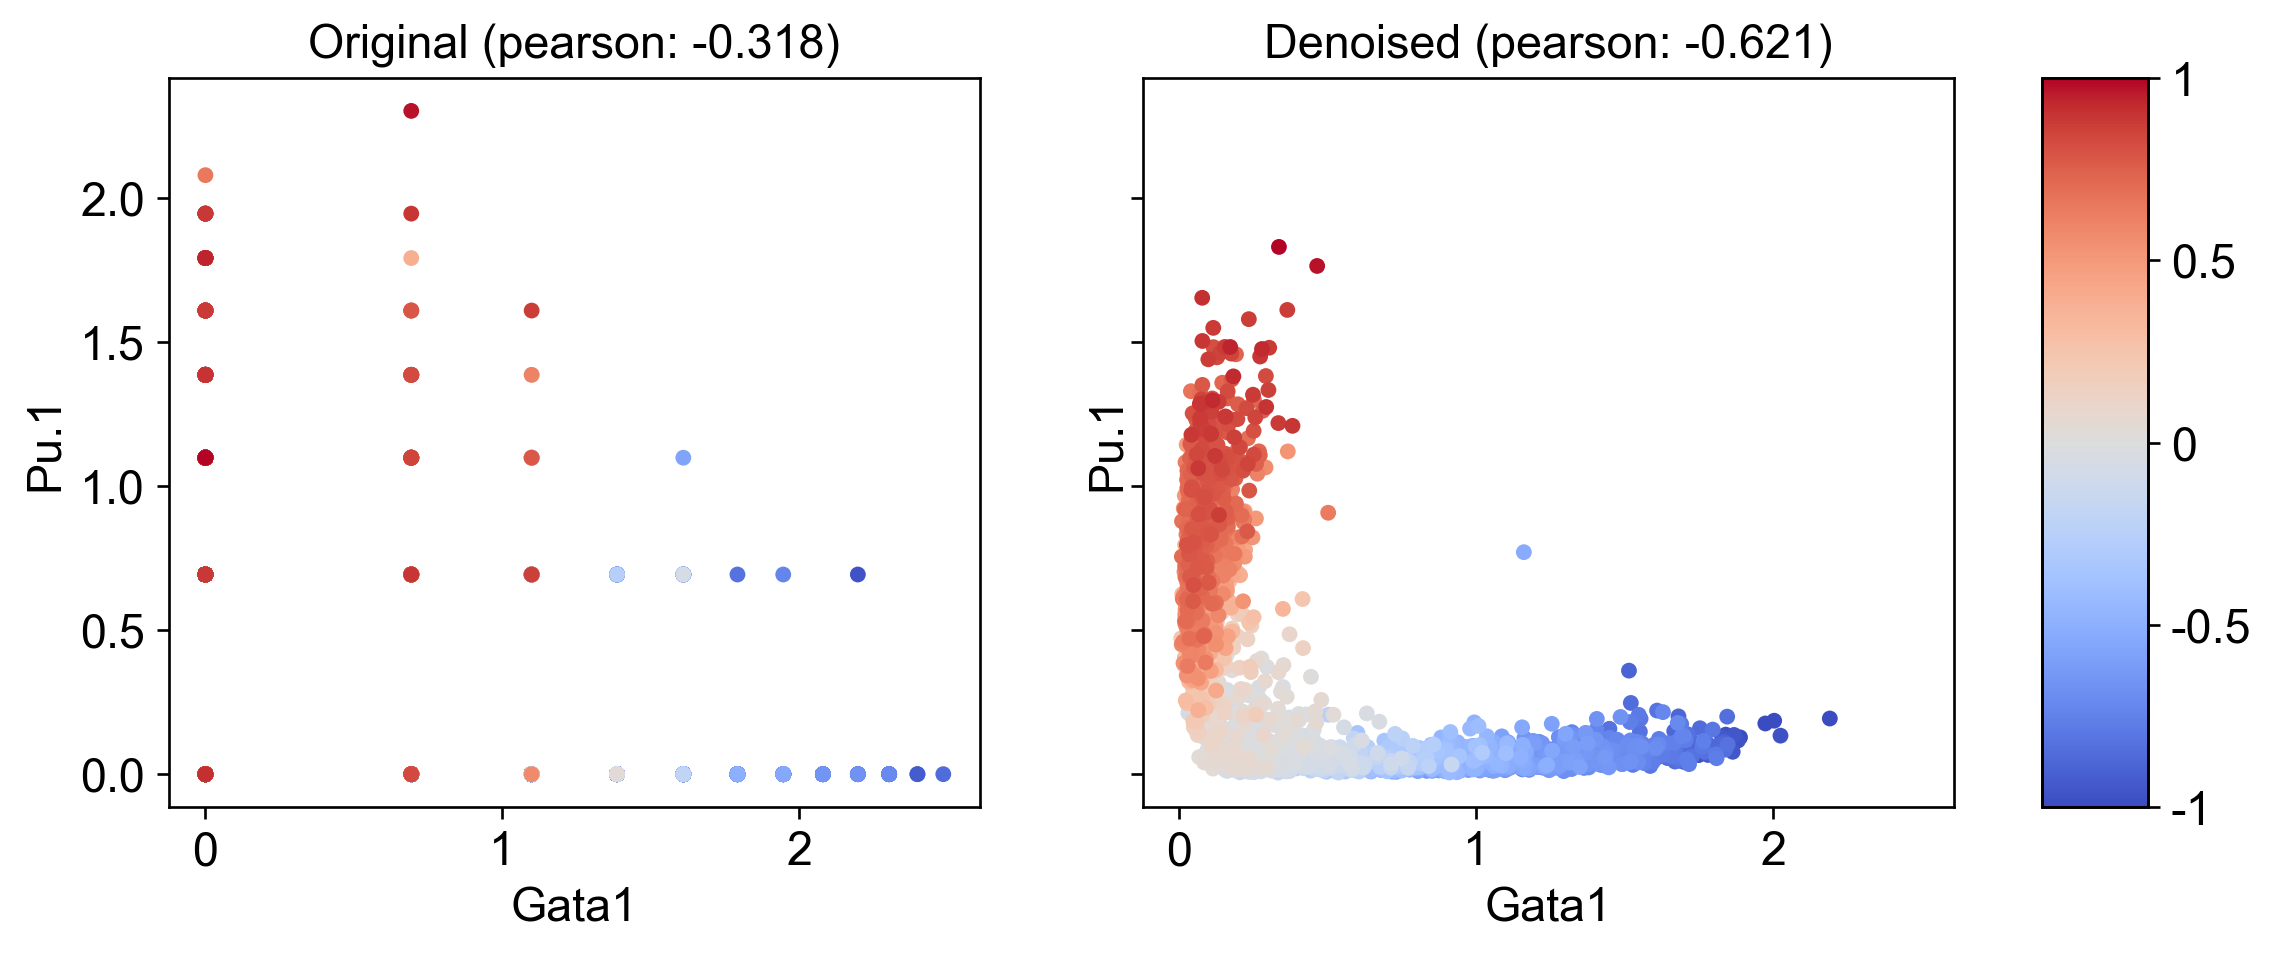

In [11]:
sc.pl.diffmap(adata_sorted, color='dpt_pseudotime', 
              title='GMP-MEP branches',
              color_map='coolwarm', size=90)

gene1 = 'Gata1'
gene2 = 'Pu.1'

f, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)

coef = np.corrcoef(adata_sorted.X[:, adata.var_names == gene1].reshape(-1), 
                   adata_sorted.X[:, adata.var_names == gene2].reshape(-1))[0, 1]

sc.pl.scatter(adata_sorted[np.isin(adata_sorted.obs.dpt_groups.values, ('1', '2'))], 
              gene1, gene2, color='dpt_pseudotime', size=90, use_raw=False, ax=ax[0],
              color_map='coolwarm', title='Original (pearson: %.3f)' % coef, show=False)

coef = np.corrcoef(adata_sorted_ae.X[:, adata.var_names == gene1].reshape(-1), 
                   adata_sorted_ae.X[:, adata.var_names == gene2].reshape(-1))[0, 1]

sc.pl.scatter(adata_sorted_ae[np.isin(adata_sorted_ae.obs.dpt_groups.values, ('1', '2'))], 
              gene1, gene2, color='dpt_pseudotime', size=90, use_raw=False, ax=ax[1],
              color_map='coolwarm', title='Denoised (pearson: %.3f)' % coef, show=False)

plt.subplots_adjust(right=0.8)

## Cells with zero Pu1-Gata1 expression

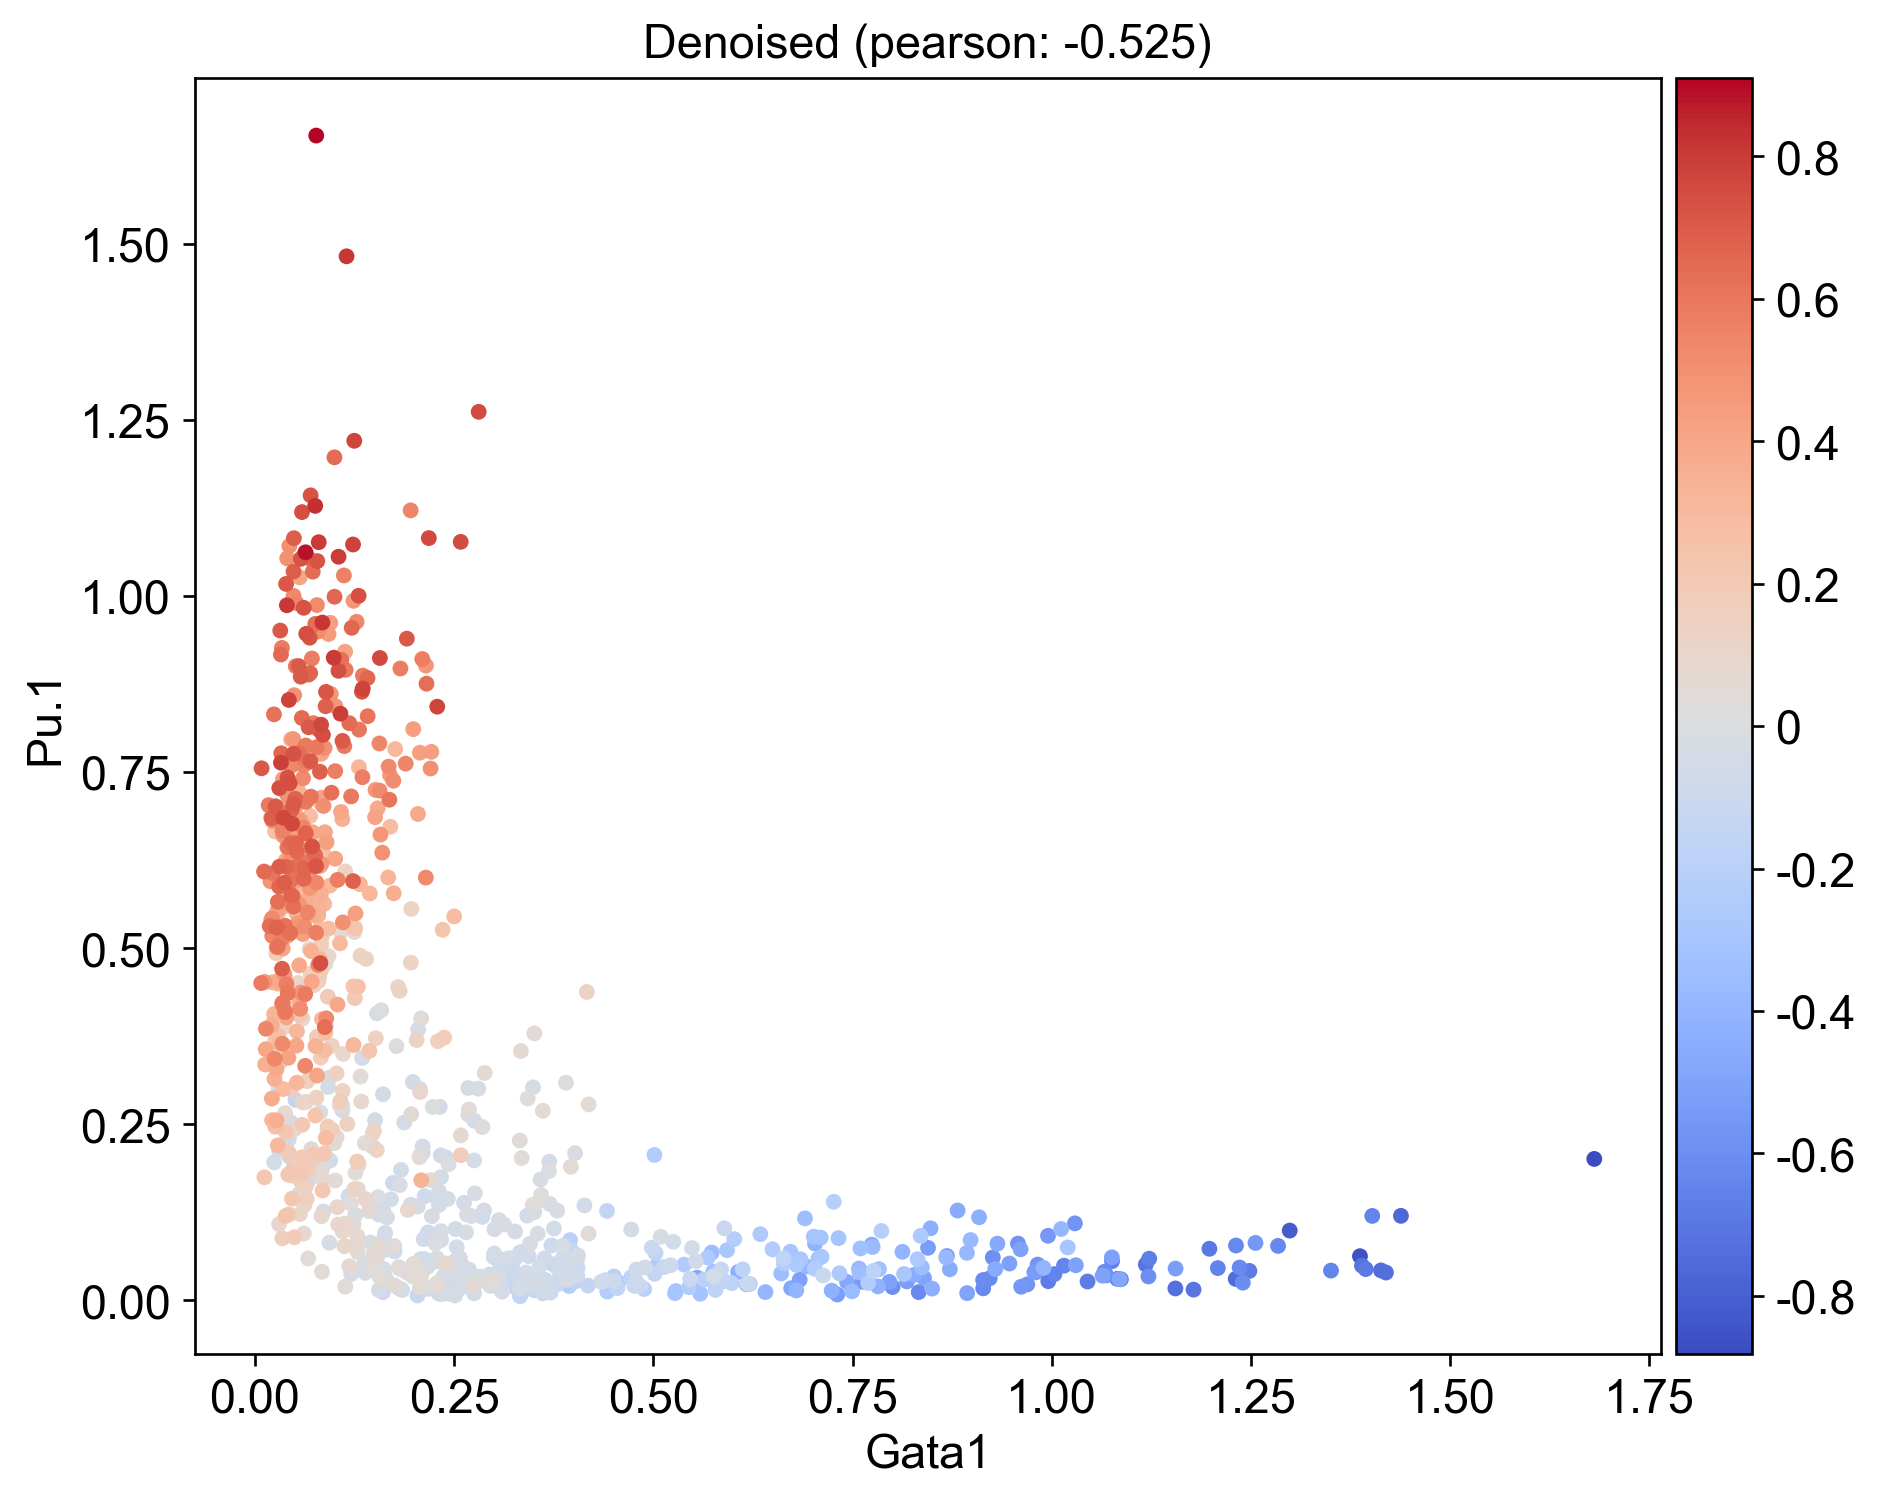

In [12]:
zero_idx = (adata_sorted.X[:, adata_ae.var_names.values == 'Pu.1'] == 0) & (adata_sorted.X[:, adata_ae.var_names.values == 'Gata1'] == 0)
zero_idx = zero_idx.ravel()

coef = np.corrcoef(adata_sorted_ae.X[zero_idx, adata_ae.var_names == gene1].reshape(-1), 
                   adata_sorted_ae.X[zero_idx, adata_ae.var_names == gene2].reshape(-1))[0, 1]

sc.pl.scatter(adata_sorted_ae[zero_idx, :],
              gene1, gene2, color='dpt_pseudotime',
              color_map='coolwarm', title='Denoised (pearson: %.3f)' % coef,
              show=True, size=90, use_raw=False)